## 0. Importing Packages

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df = pd.read_csv('E:/OneDrive - UTS/Sem 4 (Spring 2024)/Advanced ML Applications/Assignment 3/adv_mla_at3/data/interim/df_airport_farhan_faiyaz.csv',low_memory='False')

In [3]:
df.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines


In [4]:
df.dtypes

legId                                 object
searchDate                            object
flightDate                            object
startingAirport                       object
destinationAirport                    object
travelDuration                        object
isBasicEconomy                          bool
isRefundable                            bool
isNonStop                               bool
totalFare                            float64
totalTravelDistance                  float64
segmentsDepartureTimeEpochSeconds     object
segmentsDepartureTimeRaw              object
segmentsArrivalTimeEpochSeconds       object
segmentsArrivalTimeRaw                object
segmentsArrivalAirportCode            object
segmentsDepartureAirportCode          object
segmentsAirlineName                   object
segmentsAirlineCode                   object
segmentsEquipmentDescription          object
segmentsDurationInSeconds             object
segmentsDistance                      object
segmentsCa

## 1. Data Transformation

In [5]:
df_prep = df.copy(deep=True)

In [6]:
df_prep['searchDate'] = pd.to_datetime(df_prep['searchDate'], format='%Y-%m-%d')
df_prep['flightDate'] = pd.to_datetime(df_prep['flightDate'], format='%Y-%m-%d')

In [7]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines


In [8]:
#extract cabin code
df_prep['cabinCode'] = df_prep['segmentsCabinCode'].str.split('|').str[0]

In [9]:
#convert to time
df_prep['firstDepartureTimeEpoch'] = df_prep['segmentsDepartureTimeEpochSeconds'].str.split('|').str[0]

In [10]:
df_prep['firstDepartureTimeEpoch'] = pd.to_numeric(df_prep['firstDepartureTimeEpoch'], errors='coerce')

In [11]:
df_prep['departureTime'] = pd.to_datetime(df_prep['firstDepartureTimeEpoch'], unit='s').dt.time

In [12]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta,coach,1650228600,20:50:00
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta,coach,1650204600,14:10:00
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines,coach,1650202200,13:30:00
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines,coach,1650204600,14:10:00
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines,coach,1650239100,23:45:00


In [13]:
# Count the number of NaN values in the 'totalTravelDistance' column
nan_count = df_prep['totalTravelDistance'].isna().sum()

# Display the result
print(f"Number of NaN values in 'totalTravelDistance': {nan_count}")


Number of NaN values in 'totalTravelDistance': 221954


Will impute the median total distance for each combination of airport

In [14]:
# Calculate the median 'totalTravelDistance' for each (startingAirport, destinationAirport) combination
median_distances = (
    df_prep.groupby(['startingAirport', 'destinationAirport'])['totalTravelDistance']
    .median()
    .reset_index()
    .rename(columns={'totalTravelDistance': 'medianDistance'})
)

# Merge the median distances back into the original DataFrame
df_prep = df_prep.merge(median_distances, on=['startingAirport', 'destinationAirport'], how='left')

# Create a new column 'imputedTravelDistance'
df_prep['imputedTravelDistance'] = df_prep['totalTravelDistance'].fillna(df_prep['medianDistance'])

# Drop the 'medianDistance' column (optional)
df_prep.drop('medianDistance', axis=1, inplace=True)

In [15]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime,imputedTravelDistance
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta,coach,1650228600,20:50:00,2175.0
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta,coach,1650204600,14:10:00,2281.0
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines,coach,1650202200,13:30:00,2850.0
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines,coach,1650204600,14:10:00,2412.0
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines,coach,1650239100,23:45:00,2412.0


Find the number of stops and a column for each leg and if no leg then no_stop

In [16]:
stop_counts = df_prep['segmentsCabinCode'].str.count(r'\|\|')
df_prep['n_stops']=stop_counts

In [17]:
# Split different segments based on '||' delimiter
df_prep[['cabin_Leg1', 'cabin_Leg2', 'cabin_Leg3', 'cabin_Leg4']] = df_prep['segmentsCabinCode'].str.split(r'\|\|', n=4, expand=True)

# Replace None or NaN values in the new columns with 'no_stop'
df_prep[['cabin_Leg1', 'cabin_Leg2', 'cabin_Leg3', 'cabin_Leg4']] = df_prep[['cabin_Leg1', 'cabin_Leg2', 'cabin_Leg3', 'cabin_Leg4']].fillna('no_stop')

In [18]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime,imputedTravelDistance,n_stops,cabin_Leg1,cabin_Leg2,cabin_Leg3,cabin_Leg4
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta,coach,1650228600,20:50:00,2175.0,1,coach,coach,no_stop,no_stop
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta,coach,1650204600,14:10:00,2281.0,1,coach,coach,no_stop,no_stop
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines,coach,1650202200,13:30:00,2850.0,1,coach,coach,no_stop,no_stop
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines,coach,1650204600,14:10:00,2412.0,1,coach,coach,no_stop,no_stop
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines,coach,1650239100,23:45:00,2412.0,1,coach,coach,no_stop,no_stop


In [19]:
df_prep['firstDepartureTimeEpoch'] = df_prep['segmentsDepartureTimeEpochSeconds'].str.split('|').str[0]

In [20]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime,imputedTravelDistance,n_stops,cabin_Leg1,cabin_Leg2,cabin_Leg3,cabin_Leg4
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta,coach,1650228600,20:50:00,2175.0,1,coach,coach,no_stop,no_stop
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta,coach,1650204600,14:10:00,2281.0,1,coach,coach,no_stop,no_stop
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines,coach,1650202200,13:30:00,2850.0,1,coach,coach,no_stop,no_stop
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines,coach,1650204600,14:10:00,2412.0,1,coach,coach,no_stop,no_stop
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines,coach,1650239100,23:45:00,2412.0,1,coach,coach,no_stop,no_stop


In [21]:
df_prep['firstDepartureTimeEpoch'] = pd.to_numeric(df_prep['firstDepartureTimeEpoch'], errors='coerce')
df_prep['firstDepartureDateTime'] = pd.to_datetime(df_prep['firstDepartureTimeEpoch'], unit='s', errors='coerce')

In [22]:
df_prep['month'] = df_prep['firstDepartureDateTime'].dt.month
df_prep['day'] = df_prep['firstDepartureDateTime'].dt.day
df_prep['hour'] = df_prep['firstDepartureDateTime'].dt.hour
df_prep['minute'] = df_prep['firstDepartureDateTime'].dt.minute
df_prep['day_of_week'] = df_prep['firstDepartureDateTime'].dt.dayofweek  # Monday=0, Sunday=6
df_prep['week_of_year'] = df_prep['firstDepartureDateTime'].dt.isocalendar().week

In [23]:
df_prep.head()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime,imputedTravelDistance,n_stops,cabin_Leg1,cabin_Leg2,cabin_Leg3,cabin_Leg4,firstDepartureDateTime,month,day,hour,minute,day_of_week,week_of_year
0,90be63bfc2848acb3a0d9a6c588b1f7d,2022-04-16,2022-04-17,OAK,ATL,PT6H32M,False,False,False,307.60,2175.0,1650228600||1650239400,2022-04-17T13:50:00.000-07:00||2022-04-17T17:5...,1650234660||1650252120,2022-04-17T16:31:00.000-06:00||2022-04-17T23:2...,SLC||ATL,OAK||SLC,Delta||Delta,DL||DL,||Airbus A321,6060||12720,588||1587,coach||coach,6.533333,coach,Delta,coach,1650228600,20:50:00,2175.0,1,coach,coach,no_stop,no_stop,2022-04-17 20:50:00,4,17,20,50,6,15
1,2a6f46df8129bcab9b7fe6825b2e9431,2022-04-16,2022-04-17,OAK,ATL,PT7H38M,False,False,False,387.60,2281.0,1650204600||1650216900,2022-04-17T07:10:00.000-07:00||2022-04-17T10:3...,1650209700||1650232080,2022-04-17T08:35:00.000-07:00||2022-04-17T17:4...,LAX||ATL,OAK||LAX,Delta||Delta,DL||DL,Embraer 175 (Enhanced Winglets)||Airbus A321,5100||15180,338||1943,coach||coach,7.633333,coach,Delta,coach,1650204600,14:10:00,2281.0,1,coach,coach,no_stop,no_stop,2022-04-17 14:10:00,4,17,14,10,6,15
2,7bbf383c6e0433cfa4981efa7e5f459e,2022-04-16,2022-04-17,OAK,ATL,PT8H45M,True,False,False,387.60,2850.0,1650202200||1650216600,2022-04-17T06:30:00.000-07:00||2022-04-17T10:3...,1650209700||1650233700,2022-04-17T08:35:00.000-07:00||2022-04-17T18:1...,SEA||ATL,OAK||SEA,Alaska Airlines||Alaska Airlines,AS||AS,Airbus A320||Boeing 737-900,7500||17100,672||2178,coach||coach,8.750000,coach,Alaska Airlines,coach,1650202200,13:30:00,2850.0,1,coach,coach,no_stop,no_stop,2022-04-17 13:30:00,4,17,13,30,6,15
3,beb2015506ff7697a4af6af599bb07ff,2022-04-16,2022-04-17,OAK,ATL,PT14H17M,False,False,False,451.58,NaN,1650204600||1650241200,2022-04-17T07:10:00.000-07:00||2022-04-17T17:2...,1650209640||1650256020,2022-04-17T08:34:00.000-07:00||2022-04-18T00:2...,LAX||ATL,OAK||LAX,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5040||14820,None||None,coach||coach,14.283333,coach,Spirit Airlines,coach,1650204600,14:10:00,2412.0,1,coach,coach,no_stop,no_stop,2022-04-17 14:10:00,4,17,14,10,6,15
4,c5bfe3fb92bb262b94628a930fa30cef,2022-04-16,2022-04-17,OAK,ATL,PT9H6M,False,False,False,463.58,NaN,1650239100||1650258600,2022-04-17T16:45:00.000-07:00||2022-04-17T22:1...,1650244200||1650271860,2022-04-17T18:10:00.000-07:00||2022-04-18T04:5...,LAS||ATL,OAK||LAS,Spirit Airlines||Spirit Airlines,NK||NK,||AIRBUS INDUSTRIE A320 SHARKLETS,5100||13260,None||None,coach||coach,9.100000,coach,Spirit Airlines,coach,1650239100,23:45:00,2412.0,1,coach,coach,no_stop,no_stop,2022-04-17 23:45:00,4,17,23,45,6,15


In [24]:
#find the number of days before the flight wrt to the search date
df_prep['date_diff'] = (df_prep['flightDate'] - df_prep['searchDate']).dt.days

In [25]:
df_prep.tail()

,legId,searchDate,flightDate,startingAirport,destinationAirport,travelDuration,isBasicEconomy,isRefundable,isNonStop,totalFare,totalTravelDistance,segmentsDepartureTimeEpochSeconds,segmentsDepartureTimeRaw,segmentsArrivalTimeEpochSeconds,segmentsArrivalTimeRaw,segmentsArrivalAirportCode,segmentsDepartureAirportCode,segmentsAirlineName,segmentsAirlineCode,segmentsEquipmentDescription,segmentsDurationInSeconds,segmentsDistance,segmentsCabinCode,travelDurationHours,firstSegmentCabinCode,firstSegmentAirline,cabinCode,firstDepartureTimeEpoch,departureTime,imputedTravelDistance,n_stops,cabin_Leg1,cabin_Leg2,cabin_Leg3,cabin_Leg4,firstDepartureDateTime,month,day,hour,minute,day_of_week,week_of_year,date_diff
3112981,5c9f87430a9d4c181dbf7bf7e601e1a2,2022-05-19,2022-06-03,SFO,PHL,PT13H8M,False,False,False,827.19,NaN,1654293600||1654322400,2022-06-03T15:00:00.000-07:00||2022-06-03T23:0...,1654301400||1654340880,2022-06-03T17:10:00.000-07:00||2022-06-04T07:0...,SEA||PHL,SFO||SEA,American Airlines||American Airlines,AA||AA,Airbus A320||Airbus A321,7800||18480,None||None,coach||coach,13.133333,coach,American Airlines,coach,1654293600,22:00:00,2724.0,1,coach,coach,no_stop,no_stop,2022-06-03 22:00:00,6,3,22,0,4,22,15
3112982,e381378bc47d12a1a46d094b427b7429,2022-05-19,2022-06-03,SFO,PHL,PT8H17M,False,False,False,836.60,NaN,1654261200||1654279200,2022-06-03T06:00:00.000-07:00||2022-06-03T13:0...,1654274040||1654291020,2022-06-03T11:34:00.000-05:00||2022-06-03T17:1...,DFW||PHL,SFO||DFW,American Airlines||American Airlines,AA||AA,Airbus A321||Airbus A321,12840||11820,None||None,coach||coach,8.283333,coach,American Airlines,coach,1654261200,13:00:00,2724.0,1,coach,coach,no_stop,no_stop,2022-06-03 13:00:00,6,3,13,0,4,22,15
3112983,1a41964e03957c790540dda613a4e445,2022-05-19,2022-06-03,SFO,PHL,PT7H20M,False,False,False,837.60,NaN,1654258200||1654271400,2022-06-03T05:10:00.000-07:00||2022-06-03T09:5...,1654267500||1654284600,2022-06-03T08:45:00.000-06:00||2022-06-03T15:3...,DEN||PHL,SFO||DEN,United||United,UA||UA,Boeing 777||Boeing 737-800,9300||13200,None||None,coach||coach,7.333333,coach,United,coach,1654258200,12:10:00,2724.0,1,coach,coach,no_stop,no_stop,2022-06-03 12:10:00,6,3,12,10,4,22,15
3112984,c3ce778a21b9f474abdb0e0678f44164,2022-05-19,2022-06-03,SFO,PHL,PT7H49M,False,False,False,837.60,NaN,1654286760||1654307820,2022-06-03T13:06:00.000-07:00||2022-06-03T20:5...,1654302600||1654314900,2022-06-03T19:30:00.000-05:00||2022-06-03T23:5...,ORD||PHL,SFO||ORD,American Airlines||American Airlines,AA||AA,Boeing 737-800||Airbus A321,15840||7080,None||None,coach||coach,7.816667,coach,American Airlines,coach,1654286760,20:06:00,2724.0,1,coach,coach,no_stop,no_stop,2022-06-03 20:06:00,6,3,20,6,4,22,15
3112985,fb53d403fe371735d45859e6df7c7590,2022-05-19,2022-06-03,SFO,PHL,PT9H10M,False,False,False,837.60,NaN,1654266600||1654280340,2022-06-03T07:30:00.000-07:00||2022-06-03T11:1...,1654273020||1654299600,2022-06-03T09:17:00.000-07:00||2022-06-03T19:4...,LAX||PHL,SFO||LAX,American Airlines||American Airlines,AA||AA,Embraer 175||,6420||19260,None||None,coach||coach,9.166667,coach,American Airlines,coach,1654266600,14:30:00,2724.0,1,coach,coach,no_stop,no_stop,2022-06-03 14:30:00,6,3,14,30,4,22,15


Create a table to see the medianTravelDistance for all combination of destinationAirport wrt the startingAirport.

In [26]:
airport_distance_table = (
    df_prep.groupby(['startingAirport', 'destinationAirport'])['imputedTravelDistance']
    .median()
    
    .reset_index()
    .rename(columns={'imputedTravelDistance': 'medianTravelDistance'})
)

In [27]:
airport_distance_table

,startingAirport,destinationAirport,medianTravelDistance
0,OAK,ATL,2412.0
1,OAK,BOS,3039.0
2,OAK,CLT,2675.0
3,OAK,DEN,1186.0
4,OAK,DFW,1954.0
5,OAK,DTW,2328.0
6,OAK,EWR,2814.0
7,OAK,IAD,2790.0
8,OAK,JFK,2796.0
9,OAK,LAX,1432.0


In [28]:
df_final = df_prep[
    ['searchDate','startingAirport', 'destinationAirport', 'totalFare', 'imputedTravelDistance', 'n_stops', 
     'cabin_Leg1', 'cabin_Leg2', 'cabin_Leg3', 'cabin_Leg4', 'month', 'day', 'hour', 'minute', 
     'day_of_week', 'week_of_year', 'date_diff']
].rename(columns={'imputedTravelDistance': 'Travel_distance'})

In [29]:
df_final.head()

,searchDate,startingAirport,destinationAirport,totalFare,Travel_distance,n_stops,cabin_Leg1,cabin_Leg2,cabin_Leg3,cabin_Leg4,month,day,hour,minute,day_of_week,week_of_year,date_diff
0,2022-04-16,OAK,ATL,307.60,2175.0,1,coach,coach,no_stop,no_stop,4,17,20,50,6,15,1
1,2022-04-16,OAK,ATL,387.60,2281.0,1,coach,coach,no_stop,no_stop,4,17,14,10,6,15,1
2,2022-04-16,OAK,ATL,387.60,2850.0,1,coach,coach,no_stop,no_stop,4,17,13,30,6,15,1
3,2022-04-16,OAK,ATL,451.58,2412.0,1,coach,coach,no_stop,no_stop,4,17,14,10,6,15,1
4,2022-04-16,OAK,ATL,463.58,2412.0,1,coach,coach,no_stop,no_stop,4,17,23,45,6,15,1


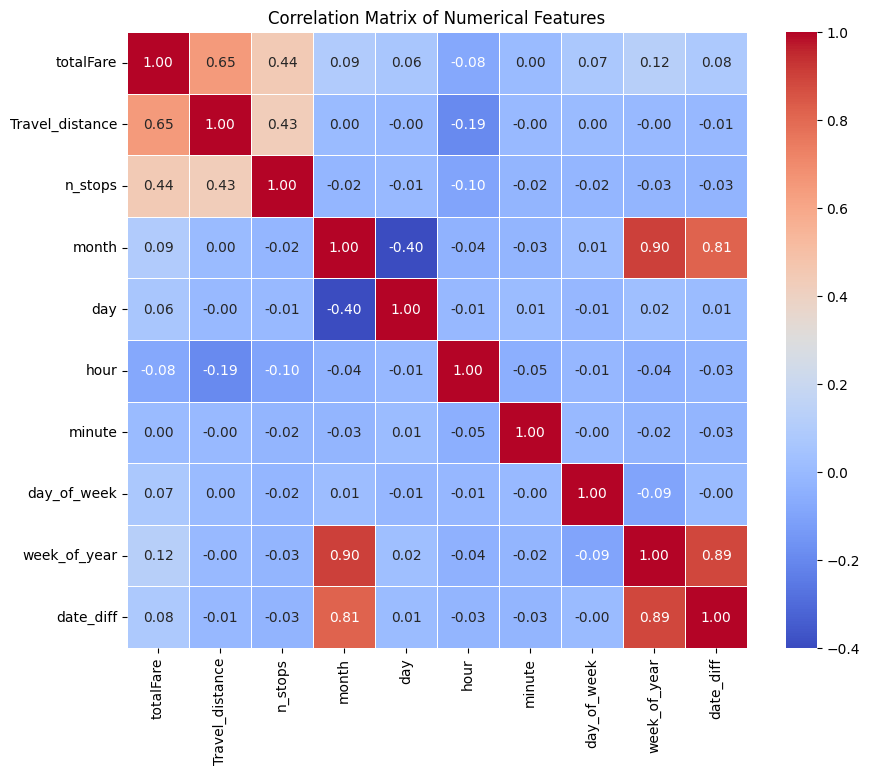

In [31]:
#make a correlation matrix to see the correaltion of totalFare with the other numerical variables
numerical_df = df_final.select_dtypes(include=[np.number])

# Calculating the correlation matrix
correlation_matrix = numerical_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features")
plt.show()

We can see that total fare has a relatively postiive relationships with travel_distance and n_stops

## 1. Data Splitting

In [39]:
# Sort df_final by 'searchDate'
df_final = df_final.sort_values(by='searchDate')

# Calculate the split indices
train_size = int(0.7 * len(df_final))
val_size = int(0.15 * len(df_final))
test_size = len(df_final) - train_size - val_size  # Remaining data goes to the test set

# Split the data into training, validation, and test sets
train_data = df_final.iloc[:train_size].drop(columns=['searchDate'])
val_data = df_final.iloc[train_size:train_size + val_size].drop(columns=['searchDate'])
test_data = df_final.iloc[train_size + val_size:].drop(columns=['searchDate'])

# Verify the sizes of the splits
print(f"Training set size: {train_data.shape}")
print(f"Validation set size: {val_data.shape}")
print(f"Test set size: {test_data.shape}")


Training set size: (2179090, 16)
Validation set size: (466947, 16)
Test set size: (466949, 16)


The dataset was split into training, validation and test in the ratio 70:15:15 respectively

C:\Users\USER\AppData\Local\Temp\ipykernel_20888\724909072.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dataset', y='Size', data=size_df, palette='Blues')


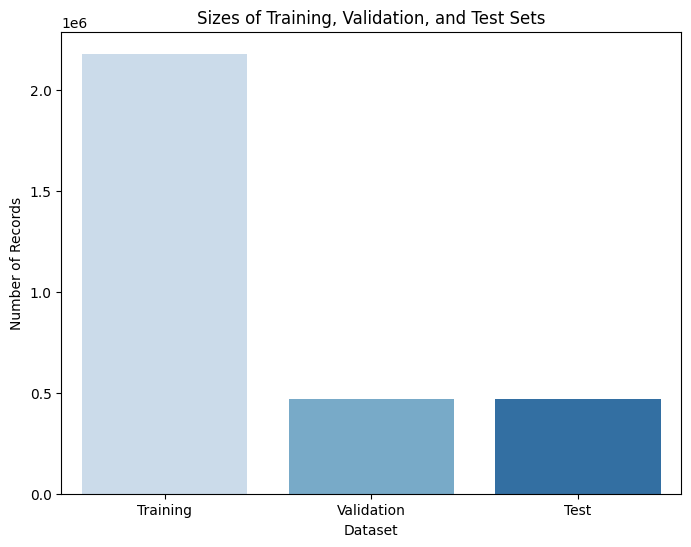

In [40]:
# Create a DataFrame to hold the sizes of the datasets
data_sizes = {
    'Dataset': ['Training', 'Validation', 'Test'],
    'Size': [len(train_data), len(val_data), len(test_data)]
}
size_df = pd.DataFrame(data_sizes)

# Plot the bar chart using Seaborn
plt.figure(figsize=(8, 6))
sns.barplot(x='Dataset', y='Size', data=size_df, palette='Blues')

# Add title and labels
plt.title('Sizes of Training, Validation, and Test Sets')
plt.xlabel('Dataset')
plt.ylabel('Number of Records')

# Display the plot
plt.show()


## 2. Save Datasets

In [41]:
# Folder path
folder_path = r"E:/OneDrive - UTS/Sem 4 (Spring 2024)/Advanced ML Applications/Assignment 3/adv_mla_at3/data/interim/"

# Save each DataFrame as a CSV file
train_data.to_csv(f"{folder_path}df_train_farhan.csv", index=False)
val_data.to_csv(f"{folder_path}df_val_farhan.csv", index=False)
test_data.to_csv(f"{folder_path}df_test_farhan.csv", index=False)

print("DataFrames saved successfully!")


DataFrames saved successfully!
